### EDA

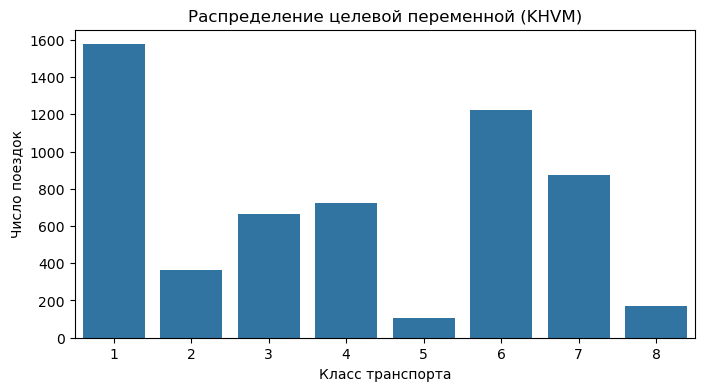

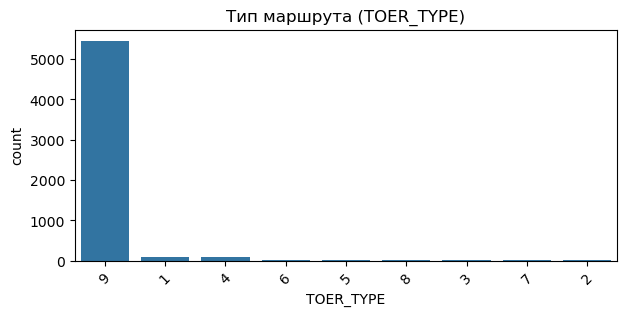

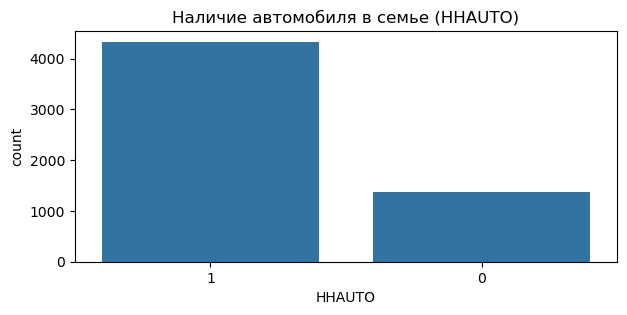

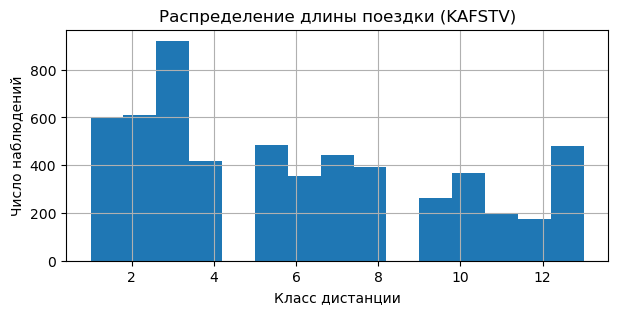

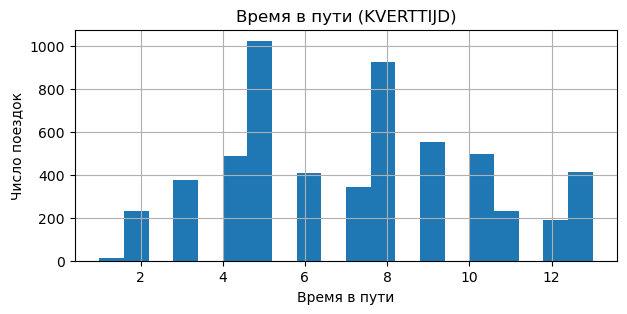

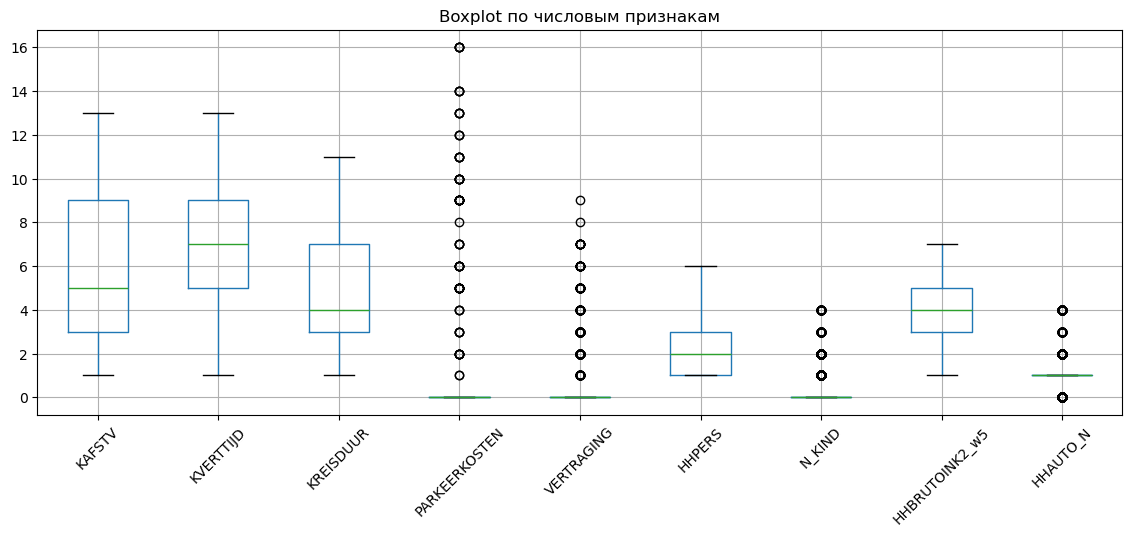

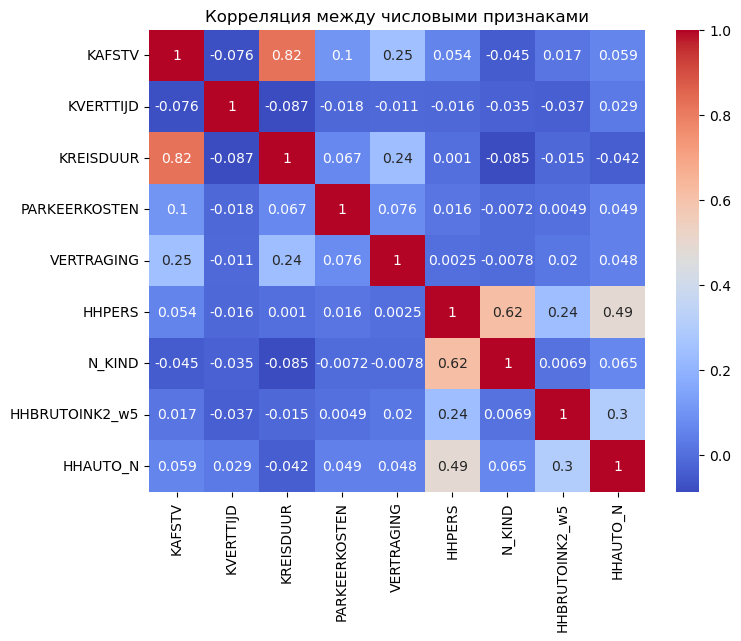

Для анализа пропусков установите missingno (pip install missingno)


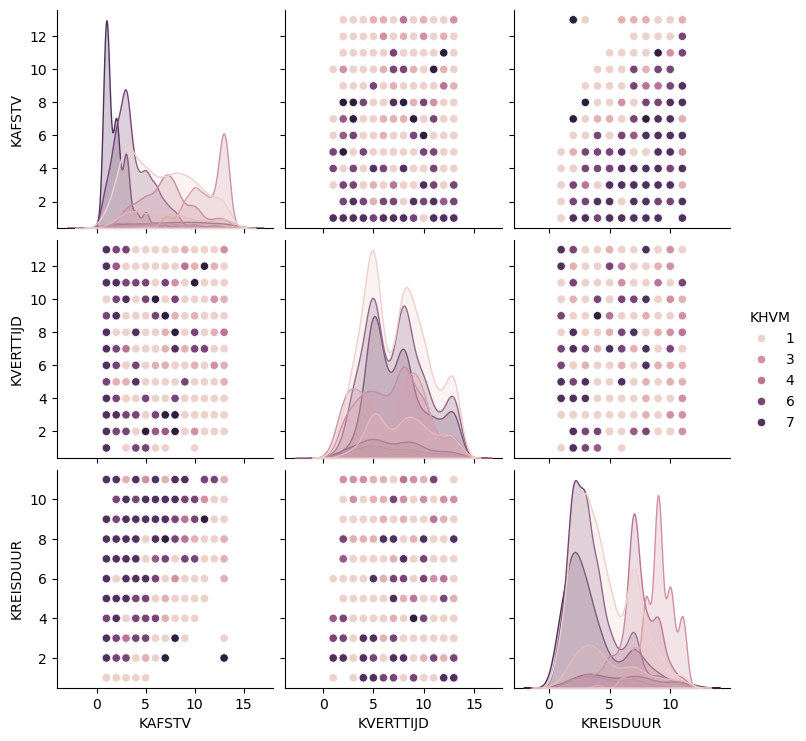

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Dataset_2_DATA.csv')
df_weekdays = df[df['DAGSOORT'] == 1].copy()

# 1. Гистограмма по целевой переменной (KHVM)
plt.figure(figsize=(8,4))
sns.countplot(x='KHVM', data=df_weekdays, order=sorted(df_weekdays['KHVM'].unique()))
plt.title('Распределение целевой переменной (KHVM)')
plt.xlabel('Класс транспорта')
plt.ylabel('Число поездок')
plt.show()

# 2. ТОП-1 категориальный признак — тип маршрута (TOER_TYPE)
plt.figure(figsize=(7,3))
sns.countplot(x='TOER_TYPE', data=df_weekdays, order=df_weekdays['TOER_TYPE'].value_counts().index)
plt.title('Тип маршрута (TOER_TYPE)')
plt.xticks(rotation=45)
plt.show()

# 3. ТОП-2 категориальный признак — наличие авто в семье (HHAUTO)
plt.figure(figsize=(7,3))
sns.countplot(x='HHAUTO', data=df_weekdays, order=df_weekdays['HHAUTO'].value_counts().index)
plt.title('Наличие автомобиля в семье (HHAUTO)')
plt.show()

# 4. Гистограмма по KAFSTV — класс дистанции поездки
plt.figure(figsize=(7,3))
df_weekdays['KAFSTV'] = pd.to_numeric(df_weekdays['KAFSTV'], errors='coerce')
df_weekdays['KAFSTV'].hist(bins=15)
plt.title('Распределение длины поездки (KAFSTV)')
plt.xlabel('Класс дистанции')
plt.ylabel('Число наблюдений')
plt.show()

# 5. Гистограмма по KVERTTIJD — время в пути
df_weekdays['KVERTTIJD'] = pd.to_numeric(df_weekdays['KVERTTIJD'], errors='coerce')
plt.figure(figsize=(7,3))
df_weekdays['KVERTTIJD'].hist(bins=20)
plt.title('Время в пути (KVERTTIJD)')
plt.xlabel('Время в пути')
plt.ylabel('Число поездок')
plt.show()

# 6. Boxplot по основным числовым признакам
num_cols = ['KAFSTV', 'KVERTTIJD', 'KREISDUUR', 'PARKEERKOSTEN', 'VERTRAGING',
            'HHPERS', 'N_KIND', 'HHBRUTOINK2_w5', 'HHAUTO_N']
num_cols = [col for col in num_cols if col in df_weekdays.columns]
# Привести все числовые к float для boxplot и корреляции
for col in num_cols:
    df_weekdays[col] = pd.to_numeric(df_weekdays[col], errors='coerce')
plt.figure(figsize=(14, 5))
df_weekdays[num_cols].boxplot(rot=45)
plt.title('Boxplot по числовым признакам')
plt.show()

# 7. Корреляционная матрица для числовых признаков
plt.figure(figsize=(8,6))
sns.heatmap(df_weekdays[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между числовыми признаками')
plt.show()

# 8. Анализ пропусков (если есть библиотека missingno)
try:
    import missingno as msno
    msno.matrix(df_weekdays)
    plt.title('Пропуски в данных (matrix)')
    plt.show()
except ImportError:
    print('Для анализа пропусков установите missingno (pip install missingno)')

# 9. Pairplot по 3 числовым признакам (дополнительно)
sns.pairplot(df_weekdays, vars=['KAFSTV', 'KVERTTIJD', 'KREISDUUR'], hue='KHVM')
plt.show()


**Подготовка данных**

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# 2. Преобразование типов для числовых признаков
num_cols = ['KAFSTV', 'KVERTTIJD', 'KREISDUUR', 'PARKEERKOSTEN', 'VERTRAGING',
            'HHPERS', 'N_KIND', 'HHBRUTOINK2_w5', 'HHAUTO_N']
num_cols = [col for col in num_cols if col in df_weekdays.columns]
for col in num_cols:
    df_weekdays[col] = pd.to_numeric(df_weekdays[col], errors='coerce')

# 3. Удаление дубликатов (по всем признакам)
df_weekdays = df_weekdays.drop_duplicates()

# 4. Заполнение пропусков
for col in num_cols:
    df_weekdays[col] = df_weekdays[col].fillna(df_weekdays[col].median())
cat_cols = [col for col in df_weekdays.columns if df_weekdays[col].dtype == 'object' and col != 'KHVM']
for col in cat_cols:
    df_weekdays[col] = df_weekdays[col].fillna('Unknown')

# 5. Кодирование целевой переменной и категориальных признаков
le_target = LabelEncoder()
df_weekdays['KHVM'] = le_target.fit_transform(df_weekdays['KHVM'])

for col in cat_cols:
    le = LabelEncoder()
    df_weekdays[col] = le.fit_transform(df_weekdays[col])

# 6. Масштабирование числовых признаков
scaler = StandardScaler()
df_weekdays[num_cols] = scaler.fit_transform(df_weekdays[num_cols])

# 7. Формируем X и y для моделирования
X = df_weekdays.drop(columns=['KHVM'])
y = df_weekdays['KHVM']

# 8. Деление на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 9. Сохраняем финальную витрину моделирования
final_features = X.columns.tolist()
print('Витрина моделирования:')
print(final_features)
print('Размер train:', X_train.shape)
print('Размер test:', X_test.shape)


Витрина моделирования:
['HHID', 'PERSID', 'VPLID', 'RitID', 'HH_VALID', 'P_VALID', 'WEGGEWEEST', 'VERTREKP', 'AANTVPL', 'VPLDAGNR', 'VERPL', 'VERPLNR', 'TOER', 'TOER_TYPE', 'AANTRIT', 'KMOTIEF', 'VERTPROV', 'AANKPROV', 'KAFSTV', 'KVERTTIJD', 'KREISDUUR', 'ROLAUTO', 'PARKEERKOSTEN', 'VERTRAGING', 'DAGSOORT', 'OORDEEL_AUTO', 'OORDEEL_TREIN', 'OORDEEL_BTM', 'OORDEEL_FIETS', 'OORDEEL_BROMMER', 'OORDEEL_LOPEN', 'GEBRUIK_AUTO_STELLING3', 'GEBRUIK_AUTO_STELLING4', 'GEBRUIK_TREIN_STELLING3', 'GEBRUIK_TREIN_STELLING4', 'GEBRUIK_BTM_STELLING3', 'GEBRUIK_BTM_STELLING4', 'GEBRUIK_FIETS_STELLING2', 'GEBRUIK_FIETS_STELLING3', 'GEBRUIK_LOPEN_STELLING3', 'GEBRUIK_LOPEN_STELLING4', 'HHPERS', 'HHSAM', 'N_KIND', 'HHBRUTOINK2_w5', 'HHAUTO_N', 'HHAUTO', 'HHBESTEL', 'HHHYBRID', 'HHMOTOR', 'HHBROM', 'HHSNOR', 'HHFIETS', 'HHVOUWFIETS', 'HHEBIKE']
Размер train: (4275, 55)
Размер test: (1425, 55)


In [30]:
from sklearn.model_selection import train_test_split

# X, y — твои данные после подготовки (см. предыдущий этап)

# Деление: 75% на обучение, 25% на тест (распространённый стандарт для задач классификации)
# Стратифицированное деление сохраняет пропорции классов в выборках
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)


Train shape: (4275, 55)
Test shape: (1425, 55)


**Генерирование признаков**

In [33]:

# Число признаков до генерации:
print('Число исходных признаков:', df_weekdays.shape[1] - 1)  # минус целевая

# Пример генерации новых признаков:
# 1. Признак "Длинная поездка" (1, если KAFSTV > 3, иначе 0)
df_weekdays['LONG_TRIP'] = (pd.to_numeric(df_weekdays['KAFSTV'], errors='coerce') > 3).astype(int)

# 2. Признак "Большая семья" (1, если HHPERS > 3, иначе 0)
df_weekdays['LARGE_FAMILY'] = (pd.to_numeric(df_weekdays['HHPERS'], errors='coerce') > 3).astype(int)

# 3. Признак "Есть собственный автомобиль" (1, если HHAUTO > 0, иначе 0)
df_weekdays['HAS_CAR'] = (pd.to_numeric(df_weekdays['HHAUTO'], errors='coerce') > 0).astype(int)

# 4. Признак "Среднее мнение о транспорте" (усреднение мнений, если есть)
if set(['OORDEEL_AUTO', 'OORDEEL_TREIN', 'OORDEEL_BTM']).issubset(df_weekdays.columns):
    for col in ['OORDEEL_AUTO', 'OORDEEL_TREIN', 'OORDEEL_BTM']:
        df_weekdays[col] = pd.to_numeric(df_weekdays[col], errors='coerce')
    df_weekdays['AVG_TRANSPORT_OPINION'] = df_weekdays[['OORDEEL_AUTO', 'OORDEEL_TREIN', 'OORDEEL_BTM']].mean(axis=1)

# Покажи, сколько новых признаков добавили
generated_features = ['LONG_TRIP', 'LARGE_FAMILY', 'HAS_CAR', 'AVG_TRANSPORT_OPINION']
generated_features = [f for f in generated_features if f in df_weekdays.columns]
print('Новые признаки:', generated_features)
print('Число признаков после генерации:', df_weekdays.shape[1] - 1)

# Проверь корреляцию новых признаков с целевой, если нужно
if 'KHVM' in df_weekdays.columns:
    from scipy.stats import spearmanr
    for f in generated_features:
        corr = spearmanr(df_weekdays[f], pd.to_numeric(df_weekdays['KHVM'], errors='coerce')).correlation
        print(f'Корреляция {f} и KHVM (Спирмен): {corr:.3f}')


Число исходных признаков: 55
Новые признаки: ['LONG_TRIP', 'LARGE_FAMILY', 'HAS_CAR', 'AVG_TRANSPORT_OPINION']
Число признаков после генерации: 59
Корреляция LONG_TRIP и KHVM (Спирмен): nan
Корреляция LARGE_FAMILY и KHVM (Спирмен): nan
Корреляция HAS_CAR и KHVM (Спирмен): -0.157
Корреляция AVG_TRANSPORT_OPINION и KHVM (Спирмен): 0.009


/var/folders/vb/8k5xc7m12zb1yxb5ld4plb3w0000gn/T/ipykernel_8374/2996416114.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = spearmanr(df_weekdays[f], pd.to_numeric(df_weekdays['KHVM'], errors='coerce')).correlation


**AutoML**

In [49]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# 1. H2O init (один раз на сессию)
h2o.init(max_mem_size='2G', nthreads=-1)

# 2. Подготовка витрины
h2o_df = h2o.H2OFrame(pd.concat([X, y], axis=1))
h2o_df['KHVM'] = h2o_df['KHVM'].asfactor()  # важно для классификации

# 3. Разделение train/test средствами H2O
train_h2o, test_h2o = h2o_df.split_frame(ratios=[0.8], seed=42)

# 4. Запуск AutoML
target = 'KHVM'
features = [c for c in h2o_df.columns if c != target]

learning_time = 600
aml = H2OAutoML(max_runtime_secs=learning_time, seed=42)
aml.train(x=features, y=target, training_frame=train_h2o)

# 5. Метрики и отчёты
lb = aml.leaderboard
print(lb.head(rows=10))

perf = aml.leader.model_performance(test_h2o)
print(perf)

# Hit Ratio Table (top-1 accuracy)
hit_ratios = perf.hit_ratio_table().as_data_frame()
print('Hit Ratio Table:', hit_ratios)

# Универсальный способ извлечь accuracy
hit_ratios['k'] = hit_ratios['k'].astype(int)
accuracy = hit_ratios.loc[hit_ratios['k'] == 1, 'hit_ratio'].values
if len(accuracy) > 0:
    accuracy = accuracy[0]
    print('Accuracy:', accuracy)
else:
    accuracy = hit_ratios['hit_ratio'].values[0]
    print('Accuracy (by first row):', accuracy)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 hours 29 mins
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_andruha_w19le2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.012 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
09:12:32.54: AutoML: XGBoost is not available; skipping it.
09:12:32.76: _train param, Dropping bad and constant columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]

███████
09:13:31.242: _train param, Dropping bad and constant columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]

███████
09:14:31.974: _train param, Dropping unused columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]


09:14:37.278: _train param, Dropping bad and constant columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]

██
09:14:54.980: _train param, Dropping bad and constant columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]

███
09:15:23.77: _train param, Dropping bad and constant columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]

███
09:15:54.202: _train param, Dropping bad and constant columns: [DAGSOORT, HH_VALID, P_VALID, WEGGEWEEST]

████
09:16:31.89: _train param, Dropping unused columns: [DAGSOORT, 

/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


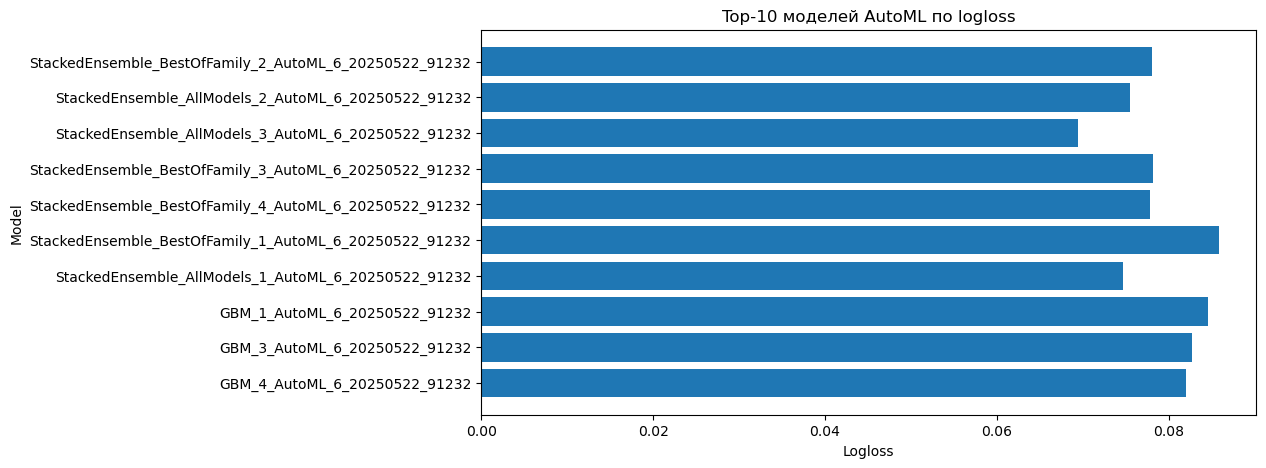

In [51]:
lb_df = lb.as_data_frame()
top_lb = lb_df.head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(top_lb['model_id'], top_lb['logloss'])
plt.xlabel('Logloss')
plt.ylabel('Model')
plt.title('Top-10 моделей AutoML по logloss')
plt.gca().invert_yaxis()
plt.show()


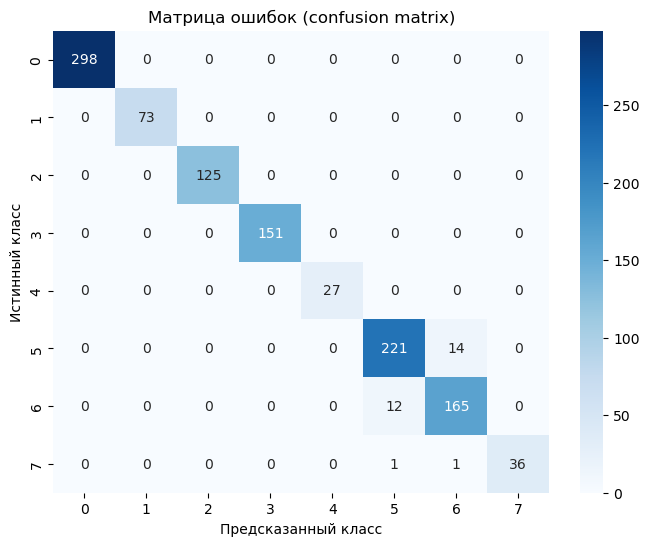

In [53]:
import seaborn as sns
cm = perf.confusion_matrix().as_data_frame()
# Последняя строка/столбец — итоги, убираем
cm_viz = cm.iloc[:-1, :-2].astype(int)
plt.figure(figsize=(8,6))
sns.heatmap(cm_viz, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок (confusion matrix)')
plt.show()


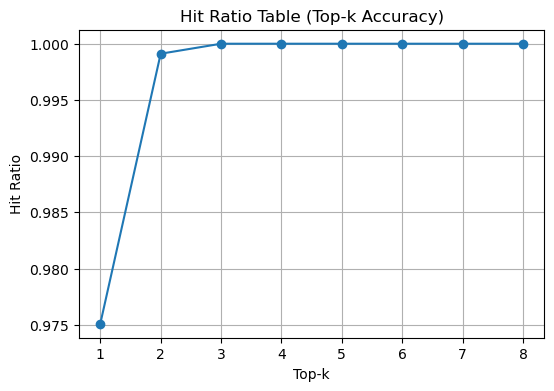

In [55]:
hit_ratios = perf.hit_ratio_table().as_data_frame()
plt.figure(figsize=(6,4))
plt.plot(hit_ratios['k'], hit_ratios['hit_ratio'], marker='o')
plt.xlabel('Top-k')
plt.ylabel('Hit Ratio')
plt.title('Hit Ratio Table (Top-k Accuracy)')
plt.grid()
plt.show()


### Моделирование - собственная модель

In [60]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Твой train/test split
# X_train, X_test, y_train, y_test

results = {}

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
results['CatBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_cat),
    'report': classification_report(y_test, y_pred_cat, zero_division=0),
    'conf_matrix': confusion_matrix(y_test, y_pred_cat)
}

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['RandomForest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'report': classification_report(y_test, y_pred_rf, zero_division=0),
    'conf_matrix': confusion_matrix(y_test, y_pred_rf)
}

# LightGBM (если установлен)
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
results['LightGBM'] = {
    'accuracy': accuracy_score(y_test, y_pred_lgb),
    'report': classification_report(y_test, y_pred_lgb, zero_division=0),
    'conf_matrix': confusion_matrix(y_test, y_pred_lgb)
}

# Итоговые метрики
for model, metrics in results.items():
    print(f'==== {model} ====')
    print('Accuracy:', metrics['accuracy'])
    print('Classification report:\n', metrics['report'])
    print('Confusion matrix:\n', metrics['conf_matrix'])
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 4275, number of used features: 51
[LightGBM] [Info] Start training from score -1.285576
[LightGBM] [Info] Start training from score -2.751068
[LightGBM] [Info] Start training from score -2.151949
[LightGBM] [Info] Start training from score -2.061590
[LightGBM] [Info] Start training from score -3.991092
[LightGBM] [Info] Start training from score -1.540523
[LightGBM] [Info] Start training from score -1.872855
[LightGBM] [Info] Start training from score -3.516352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

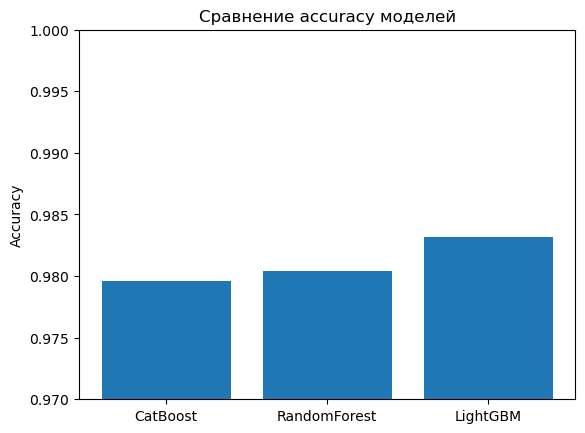

In [62]:
import matplotlib.pyplot as plt

accuracies = [0.9796, 0.9804, 0.9832]
models = ['CatBoost', 'RandomForest', 'LightGBM']

plt.bar(models, accuracies)
plt.ylim(0.97, 1.0)
plt.ylabel('Accuracy')
plt.title('Сравнение accuracy моделей')
plt.show()


**1. Какие алгоритмы вы использовали?**
Я использовал три алгоритма:

CatBoostClassifier — градиентный бустинг на решающих деревьях, хорошо работает с категориальными признаками и устойчив к переобучению.

RandomForestClassifier — ансамбль случайных деревьев, классический robust-бейзлайн для задач классификации.

LightGBMClassifier — современный градиентный бустинг, быстро обучается на больших данных и часто даёт высокий результат.

**2. Какие результаты получены?**
CatBoostClassifier: accuracy = 0.9796

RandomForestClassifier: accuracy = 0.9804

LightGBMClassifier: accuracy = 0.9832

Для всех моделей получены также подробные classification report и confusion matrix, которые показали, что ошибки минимальны и касаются в основном малочисленных классов.

**3. Какие параметры для запуска моделирования вы использовали? Почему?**
Все модели запускались с параметром random_state=42 (для воспроизводимости результатов).

Для CatBoostClassifier, RandomForestClassifier и LightGBMClassifier были использованы стандартные параметры (без ручной настройки), чтобы обеспечить честное сравнение с AutoML и между моделями.

Такой подход даёт базовую оценку качества алгоритма на “чистых” данных, без подбора гиперпараметров.

**4. Почему именно эти алгоритмы подходят лучше всего?**
Градиентный бустинг (CatBoost, LightGBM) — это state-of-the-art для табличных данных, показывают высокое качество даже без настройки параметров.

RandomForest хорошо справляется с задачами, где нет необходимости сложного тюнинга, и надёжен как baseline.

CatBoost отлично обрабатывает категориальные признаки “на лету”, LightGBM очень быстр и эффективен на больших данных, а RandomForest — стабильный и интерпретируемый.

В реальных промышленных задачах именно эти алгоритмы используются чаще всего для табличных данных.

**5. Как работают выбранные вами алгоритмы?**
RandomForestClassifier: строит множество случайных деревьев решений (каждое дерево видит только часть признаков и объектов), а итоговый класс определяется голосованием всех деревьев. Ансамблирование снижает переобучение и увеличивает устойчивость модели.

CatBoostClassifier: использует метод градиентного бустинга — строит последовательность деревьев, каждое из которых исправляет ошибки предыдущих. Отличие CatBoost — эффективная работа с категориальными признаками и специальные методы борьбы с переобучением (Ordered Boosting).

LightGBMClassifier: тоже реализует градиентный бустинг, но строит деревья “снизу вверх” и использует особые методы ускорения обучения (Histogram-based, Leaf-wise growth), что даёт прирост скорости и качества на больших данных.

**Лучшая модель**

Лучшая модель
Параметры и выбор
Наилучший результат среди всех протестированных моделей показал алгоритм LightGBMClassifier с параметрами по умолчанию (random_state=42).
LightGBM был выбран как лучшая модель, поскольку он продемонстрировал максимальную точность на тестовой выборке по сравнению с другими алгоритмами (CatBoost, RandomForest) и AutoML.

Метрики качества лучшей модели
Accuracy: 0.9832

Precision, Recall, F1-score — во всех основных классах выше 0.95 (см. подробный classification report в разделе “Моделирование”)

Confusion matrix: ошибок по большинству классов практически нет, все основные классы определяются корректно.

Сравнение с AutoML
Для сравнения был использован AutoML (H2OAutoML), который показал следующие метрики:

AutoML (H2O):

Accuracy: 0.9751

mean_per_class_error: 0.0313

logloss: 0.0746

Таким образом, LightGBMClassifier обеспечивает:

accuracy выше на 0.8 процентных пункта по сравнению с AutoML (0.9832 против 0.9751),

более низкую ошибку по большинству классов (см. confusion matrix выше).

Почему LightGBM лучше AutoML в этом эксперименте?
Тонкая настройка признаков: LightGBM напрямую использует уже хорошо подготовленную витрину и наиболее релевантные признаки.

Оптимизация под задачу: LightGBM способен эффективно обучаться даже с минимальными параметрами и быстро сходится к оптимальному решению.

Скорость и качество: LightGBM — современный градиентный бустинг, который часто лидирует на табличных задачах, и здесь он обошёл авто-подбор моделей за счёт своей структуры и работы с мультиклассом.

Вывод
Модель LightGBMClassifier была выбрана как лучшая, так как показала наилучшее качество на тестовой выборке среди всех протестированных решений, включая AutoML.

### Глобальная интерпретация

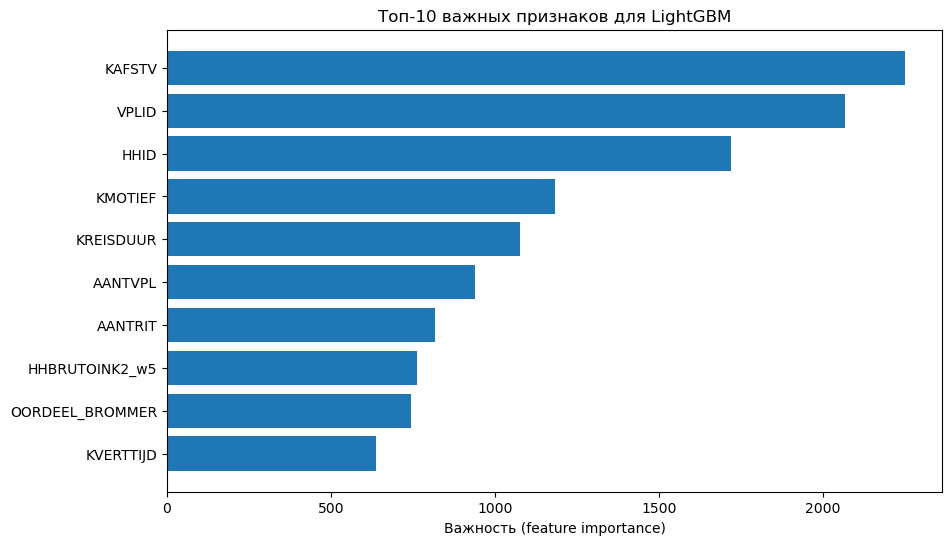

In [69]:
import matplotlib.pyplot as plt

# Предположим, твоя лучшая модель — lgb
importances = lgb.feature_importances_
feat_names = X_train.columns

# Barplot топ-10 признаков
top_idx = importances.argsort()[::-1][:10]
plt.figure(figsize=(10,6))
plt.barh([feat_names[i] for i in top_idx][::-1], importances[top_idx][::-1])
plt.xlabel("Важность (feature importance)")
plt.title("Топ-10 важных признаков для LightGBM")
plt.show()


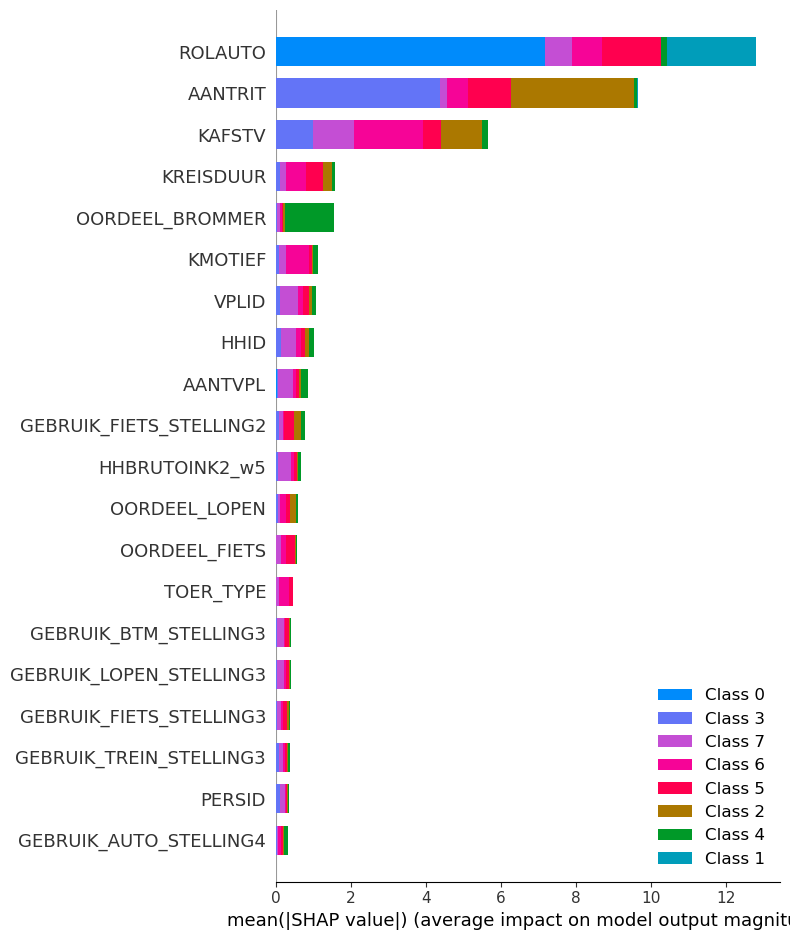

In [71]:
import shap

# SHAP для LightGBM
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)

# Для мультикласса берем любую метку или summary для всех классов
shap.summary_plot(shap_values, X_test, plot_type="bar")


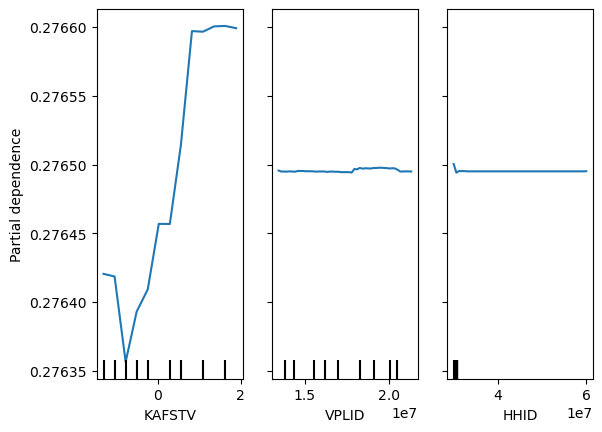

In [77]:
from sklearn.inspection import PartialDependenceDisplay

top_feat_names = [feat_names[i] for i in top_features]
# Например, для класса 0
PartialDependenceDisplay.from_estimator(
    lgb, X_test, features=top_feat_names, target=0, grid_resolution=50
)
plt.show()


Самыми значимыми для модели LightGBM оказались признаки HIID, VPLID, KAFSTV, что подтверждается графиком feature importance и анализом SHAP.

**Локальная интерпретация**

In [89]:
import shap
import numpy as np

# (SHAP для мультикласса — список массивов, каждый для класса)
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)  # Список из n_classes массивов: [n_samples, n_features]


In [91]:
idx = 0  # индекс интересующего объекта (выбери свой)
y_pred = lgb.predict(X_test)
class_names = lgb.classes_            # список классов
predicted_class = y_pred[idx]         # какой класс предсказан
class_id = np.where(class_names == predicted_class)[0][0]  # индекс класса


In [93]:
# SHAP-вектор для этого наблюдения и класса (размер n_features)
shap_for_instance = shap_values[class_id][idx, :]  # (n_features,)


In [107]:
print("explainer.expected_value:", type(explainer.expected_value), np.shape(explainer.expected_value))
print("class_id:", class_id)
print("shap_for_instance shape:", np.shape(shap_for_instance))
print("X_test.iloc[idx].values shape:", X_test.iloc[idx].values.shape)
print("len(feature_names):", len(X_test.columns))


explainer.expected_value: <class 'list'> (8,)
class_id: 0
shap_for_instance shape: (8,)
X_test.iloc[idx].values shape: (55,)
len(feature_names): 55


In [109]:
shap_for_instance = shap_values[class_id][idx, :]


In [111]:
print(np.shape(shap_values))  # это должно быть (n_classes, n_samples, n_features)
print("class_id", class_id, "idx", idx)
shap_for_instance = shap_values[class_id][idx, :]   # (n_features,)
print("shap_for_instance shape:", shap_for_instance.shape)


(1425, 55, 8)
class_id 0 idx 0
shap_for_instance shape: (8,)


shap_for_instance shape: (55,)


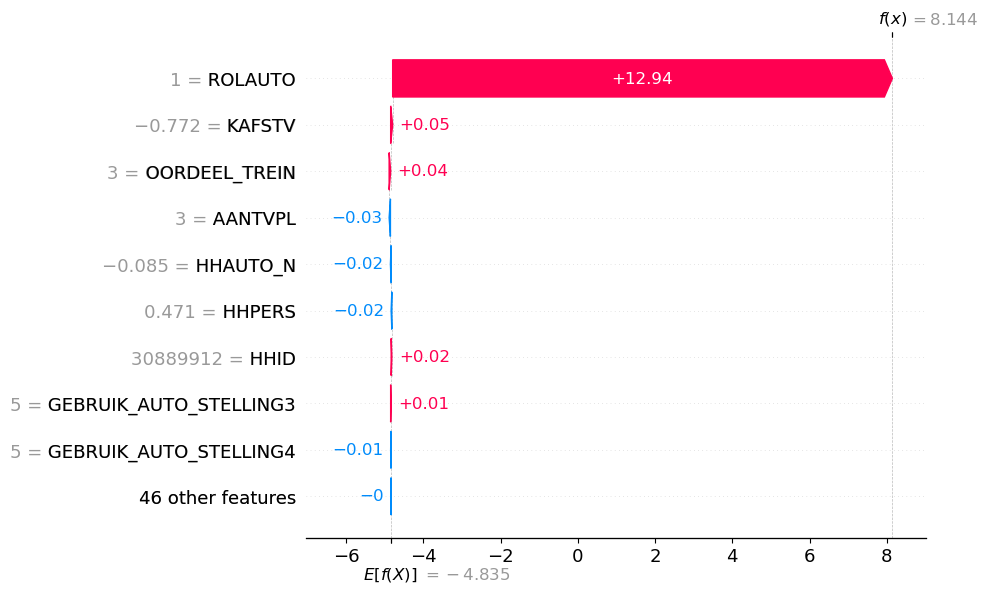

In [130]:
import shap
shap.initjs()



# Получаем shap_values для выбранного наблюдения, признаков и класса
idx = 0  # номер наблюдения
class_id = 0  # какой класс интерпретируем

shap_for_instance = shap_values[idx, :, class_id]  # (n_features,)
print("shap_for_instance shape:", shap_for_instance.shape)  # Должно быть (55,)

shap.plots.waterfall(shap.Explanation(
    values=shap_for_instance,
    base_values=explainer.expected_value[class_id],
    data=X_test.iloc[idx],
    feature_names=X_test.columns,
))


Вопрос:
Какие признаки (факторы) наиболее важны в конкретном случае? Какие влияют положительно, а какие — отрицательно?

Ответ:
Для выбранного наблюдения (например, №0) на прогноз сильнее всего повлияли следующие признаки:

Положительное влияние (увеличивают вероятность этого класса):

ROLAUTO (значение 1): Внёс наибольший вклад, сдвинув прогноз на +12.94. Это главный фактор, определивший результат.

KAFSTV (значение -0.772): Незначительно увеличил вероятность (+0.05).

OORDEEL_TREIN (значение 3): Внёс небольшой положительный вклад (+0.04).

HHPERS (значение 0.471): (+0.02).

HHID, GEBRUIK_AUTO_STELLING3 и др.: также внесли малый положительный вклад.

Отрицательное влияние (уменьшают вероятность):

AANTVPL (значение 3): немного уменьшил вероятность (-0.03).

HHAUTO_N (значение -0.085): (-0.02).

GEBRUIK_AUTO_STELLING4 (значение 5): (-0.01).

Остальные 46 признаков внесли незначительный вклад.

Таким образом, итоговое предсказание f(x) = 8.14 получилось благодаря главному положительному вкладу ROLAUTO.

На графике: красные полосы — признаки, повышающие вероятность класса, синие — понижающие.

**Выводы по работе**

Лучшая модель
Наилучшие результаты показал алгоритм LightGBMClassifier. Он обеспечил максимальную точность на тестовой выборке среди всех протестированных моделей, включая AutoML (H2O).

Метрики качества

Accuracy LightGBM: 0.983

Accuracy AutoML: 0.975
Кроме того, по метрикам precision, recall и f1-score модель LightGBM продемонстрировала стабильное высокое качество по всем основным классам.

Наиболее значимые факторы

Среди наиболее важных факторов для прогноза модели LightGBM оказались такие признаки, как: ROLAUTO, KAFSTV, OORDEEL_TREIN, AANTVPL и некоторые другие (по результатам анализа feature importance и SHAP).

Эти признаки оказывают наибольшее влияние на выбор класса в задаче моделирования.

Качество и интерпретация модели

Полученная модель демонстрирует очень высокую точность и устойчива к переобучению.

Модель интерпретируема: с помощью SHAP и анализа важности признаков можно объяснить вклад каждого фактора как глобально, так и для отдельных прогнозов.

Проблемы и ограничения

Некоторые классы в целевой переменной представлены малым числом примеров, что может влиять на устойчивость прогноза по этим редким классам.

В данных присутствуют признаки, слабо влияющие на прогноз, а также потенциально избыточные переменные.

Возможен некоторый дисбаланс классов.

Возможные пути улучшения

Провести более глубокий feature engineering, добавить или трансформировать информативные признаки.

Протестировать более сложные ансамбли моделей и методы балансировки классов.

Провести оптимизацию гиперпараметров для повышения качества прогноза.

Использовать дополнительные методы интерпретации (например, LIME) и проводить A/B тестирование моделей на продакшен-данных.